In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, display_html
from tqdm import tqdm

In [3]:
import sys
sys.path.append("..")
from rllib.student import student
from rllib.dp import dp
from rllib.linear_solver import linear_solver
from rllib import misc

# define student MDP

In [4]:
o = student()

## check R

In [5]:
df = pd.DataFrame(o.R, columns=o.A, index=o.S)
df.style.apply(misc.color_positive_green, mask=o.R, axis=None).format(precision=1)

,facebook,quit,study,sleep,pub,other
class1,-1.0,0.0,-2.0,0.0,0.0,0.0
class2,0.0,0.0,-2.0,0.0,0.0,0.0
class3,0.0,0.0,10.0,0.0,1.0,0.0
fb,-1.0,0.0,0.0,0.0,0.0,0.0
sleeping,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
np.einsum('sa,sa->s', o.Π, o.R)

array([-1.5, -1. ,  5.5, -0.5,  0. ])

# Compute V*(s)

In [7]:
hist = []
V = np.zeros(5)
hist.append(V)
for i in range(10):
    V = dp.compute_v_star(o, V)
    hist.append(V)

In [8]:
V

array([ 6.,  8., 10.,  6.,  0.])

In [9]:
df = pd.DataFrame(hist, columns=o.S)

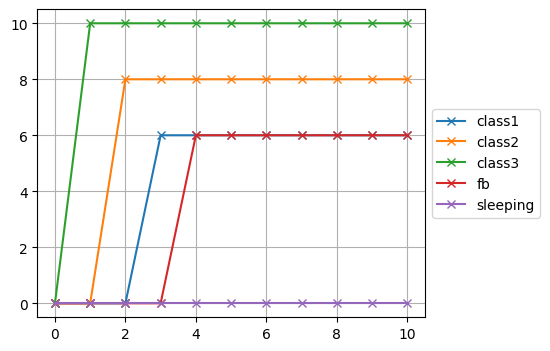

In [10]:
fig, ax = plt.subplots(figsize=(5, 4))

df[:].plot(marker='x', ax=ax)
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()